In [108]:
" Common libraries " 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [109]:
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\Robin - Data Science\1-Hotel Bookings Demand - Kaggle\Hotel-Booking-Demand\data"
data = pd.read_csv(f'{folder_path}\\hotel_after_eda.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 4.0 Feature Engineering

### Re-encoding Some Features
#### <font color=green>Feature Engineering</font>

arrival_date_year

In [110]:
# Encode 'arrival_date_year' feature
data['arrival_date_year'].value_counts(dropna=False)

arrival_date_year
2016    42391
2017    31692
2015    13313
Name: count, dtype: int64

In [111]:
# "2015", "2016", "2017" are the big number and will effect model learning
data = data.replace({'arrival_date_year': {2015: '2015', 2016: '2016', 2017: '2017'}})
# data.info()

stays_in_weekend_nights

In [112]:
data['stays_in_weekend_nights'].value_counts(dropna=False)

stays_in_weekend_nights
0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
19        1
18        1
Name: count, dtype: int64

In [113]:
# Encode 'stays_in_weekend_nights' feature
data['stays_in_weekend_nights'] = ['0 weekend night' if x == 0
                 else '1 weekend night' if x == 1
                 else '2 weekend night' if x == 2
                 else '3 weekend night' if x == 3
                 else '4 weekend night' if x == 4
                 else '5 weekend night' if x == 5                 
                 else 'N/A'
                 for x in data['stays_in_weekend_nights']]

In [114]:
# Encode 'stays_in_week_nights' feature
data['stays_in_week_nights'] = ['0 week night' if x == 0
                 else '1 week night' if x == 1
                 else '2 week night' if x == 2
                 else '3 week night' if x == 3
                 else '4 week night' if x == 4
                 else '5 week night' if x == 5
                 else '6 week night' if x == 6
                 else '7 week night' if x == 7
                 else '8 week night' if x == 8
                 else '9 week night' if x == 9
                 else '10 week night' if x == 10
                 else 'N/A'
                 for x in data['stays_in_week_nights']]

In [115]:
# Encode 'adults' feature
data['adults'] = ['0 adult' if x == 0
                 else '1 adult' if x == 1
                 else '2 adults' if x == 2
                 else '3 adults' if x == 3
                 else '4 adults' if x == 4
                 else '5 adults' if x == 5
                 else 'N/A'
                 for x in data['adults']]

In [116]:
# Encode 'babies' feature
data['babies'] = ['0 babies' if x == 0
                 else '1 baby' if x == 1
                 else '2 babies' if x == 2
                 else 'N/A'
                 for x in data['babies']]

In [117]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
display(data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(data.describe(include = ['O']).T)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
children,87396.0,0.138519,0.454650,0.00,0.0,0.0,0.0,3.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0
previous_cancellations,87396.0,0.030413,0.369145,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,87396.0,0.183990,1.731894,0.00,0.0,0.0,0.0,72.0
booking_changes,87396.0,0.271603,0.727245,0.00,0.0,0.0,0.0,21.0
agent,87396.0,81.004657,109.945638,0.00,9.0,9.0,234.0,535.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_year,87396,3,2016,42391
arrival_date_month,87396,12,August,11257
stays_in_weekend_nights,87396,7,0 weekend night,35151
stays_in_week_nights,87396,12,1 week night,22191
adults,87396,7,2 adults,64497
babies,87396,4,0 babies,86482
meal,87396,5,BB,67978
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141


In [118]:
data = data.drop('reservation_status_date', axis=1)
data.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status']

## 3. Feature Selection 
### 3.1 Numerical Columns
- A. Correlation Matrix and Heat-Map
- B. Recursive Feature Elimination
- C. Feature Importance (ExtraTreesClassifier())

### A. Correlation Matrix and Heat-Map

 Heat map for categorical columns: 


<Axes: >

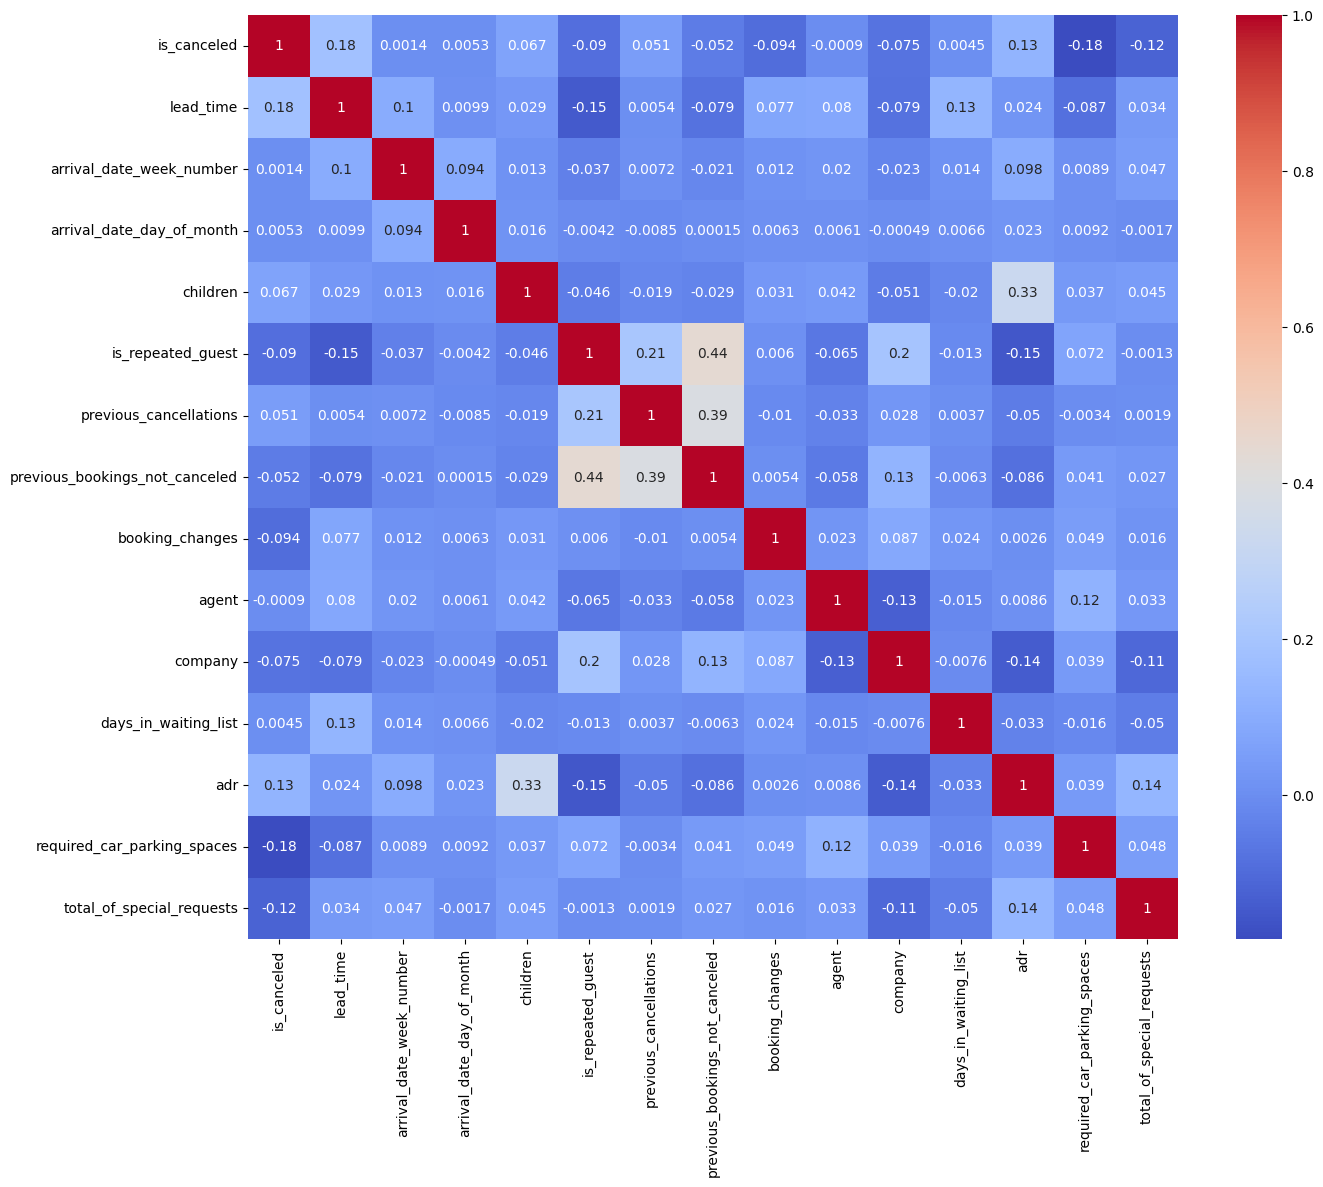

In [119]:
### Correlation
num_cols = data.select_dtypes(include = [np.number]).columns
corr_matrix = data[num_cols].corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(15,12))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))
plt.show()

- The features exhibit low correlations with one another, indicating that multicollinearity is not a concern in this analysis.

#### Sort out the Important Numerical Features

In [120]:
num_fea_corr = data[num_cols].corr()["is_canceled"]
num_fea_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.184806
required_car_parking_spaces       0.184206
adr                               0.127986
total_of_special_requests         0.120545
booking_changes                   0.093644
is_repeated_guest                 0.089643
company                           0.074758
children                          0.067141
previous_bookings_not_canceled    0.052154
previous_cancellations            0.051468
arrival_date_day_of_month         0.005328
days_in_waiting_list              0.004464
arrival_date_week_number          0.001443
agent                             0.000900
Name: is_canceled, dtype: float64

### B. Recursive Feature Elimination

In [121]:
num_type = data.select_dtypes(include = [np.number]).columns.tolist()
X_numeric = data[num_type]

X_numeric = X_numeric.drop('is_canceled', axis=1)
display(X_numeric.head(2))
y = data['is_canceled']

## Scale the numeric variable using satnde
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numeric_scale = pd.DataFrame(scaler.fit_transform(X_numeric), columns = X_numeric.columns)
display(X_numeric_scale.head(2))
# print(X_numeric.shape)
# print(X_numeric.info())

,lead_time,arrival_date_week_number,arrival_date_day_of_month,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0.0,0,0,0,3,0.0,0.0,0,0.0,0,0
1,737,27,1,0.0,0,0,0,4,0.0,0.0,0,0.0,0,0


,lead_time,arrival_date_week_number,arrival_date_day_of_month,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.045939,0.011822,-1.676896,-0.304674,-0.201653,-0.082389,-0.106237,3.751709,-0.736774,-0.203837,-0.074839,-1.932925,-0.29917,-0.839684
1,7.636196,0.011822,-1.676896,-0.304674,-0.201653,-0.082389,-0.106237,5.126769,-0.736774,-0.203837,-0.074839,-1.932925,-0.29917,-0.839684


In [122]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(solver='lbfgs', random_state=42, n_jobs=-1)

# create the RFE model and select 3 attributes
rfe = RFE(estimator=model, n_features_to_select=5)
rfe = rfe.fit(X_numeric_scale, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

# Get the names of the selected features
selected_features = X_numeric_scale.columns[rfe.support_]
# Print the selected feature names
print("Selected Features:", selected_features.tolist())

[ True False False False False  True  True False False False False  True
  True False]
[ 1  6 10  7  4  1  1  3  9  5  8  1  1  2]
Selected Features: ['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces']


### C. Feature Importance (ExtraTreesClassifier())

[0.23885254 0.1194938  0.14035737 0.01114228 0.00644499 0.02636727
 0.00388506 0.0349767  0.12870232 0.01037384 0.00456358 0.19724618
 0.03331919 0.0442749 ]


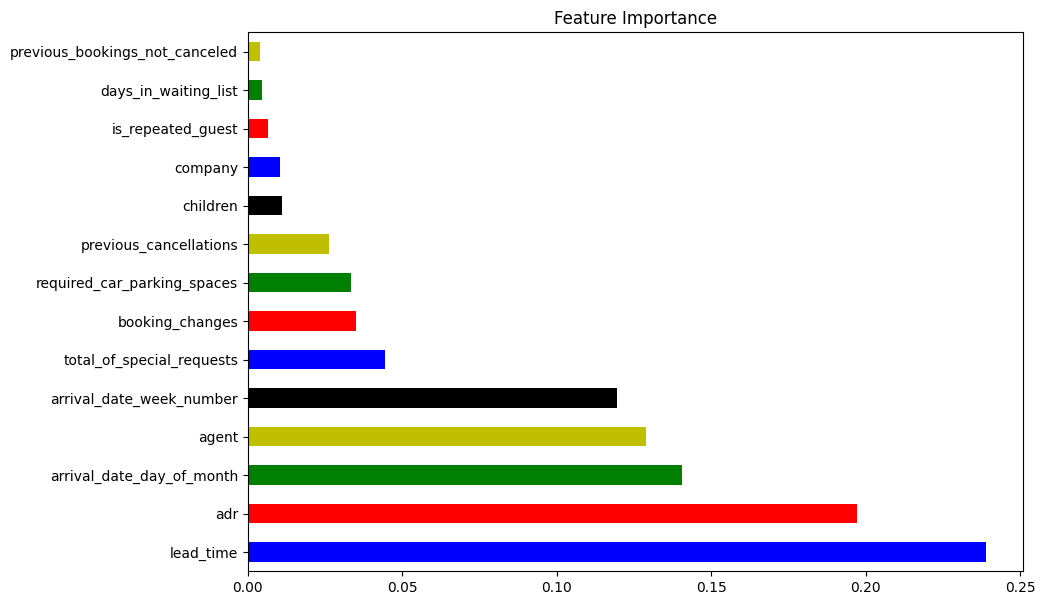

In [123]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_numeric_scale, y)
# display the relative importance of each attribute
print(model.feature_importances_)

# feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_numeric_scale.columns)

from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(feat_importances)))
plt.figure(figsize = (10, 7))
feat_importances.nlargest(15).plot(kind='barh', color=my_colors, title = 'Feature Importance')

# feat_importances.nlargest(15).sns.countplot()
plt.show()

##### Based on Feature Importance removing few numerical columns

In [124]:
data = data.drop(['days_in_waiting_list','previous_bookings_not_canceled', 'is_repeated_guest', 'children', 'company'], axis=1)
data.shape

(87396, 25)

## 3.2 Categorical Features
- A. Chi Sqaure Test - to test multicollinearity of Categorical columns with Target column
- B. Chi Square Test & Fisher Score - for feature importance

### A. Chi Square Test - Test multicollinearity with target

In [125]:
chi2_test = []
categorical_features = data.select_dtypes(include='object').columns.tolist()
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['is_canceled'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,hotel,Reject Null Hypothesis
1,arrival_date_year,Reject Null Hypothesis
2,arrival_date_month,Reject Null Hypothesis
3,stays_in_weekend_nights,Reject Null Hypothesis
4,stays_in_week_nights,Reject Null Hypothesis
5,adults,Reject Null Hypothesis
6,babies,Reject Null Hypothesis
7,meal,Reject Null Hypothesis
8,market_segment,Reject Null Hypothesis
9,distribution_channel,Reject Null Hypothesis


- None of the categorical columns are important, so we need to make more test

### B. Chi Square Test - Feature Importance

In [126]:
X_cat = data[categorical_features]
y = data['is_canceled']

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
X_cat = X_cat.apply(lambda col: le.fit_transform(col))
X_cat.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,1,0,5,0,0,2,0,0,3,1,2,2,0,2,1
1,1,0,5,0,0,2,0,0,3,1,2,2,0,2,1
2,1,0,5,0,1,1,0,0,3,1,0,2,0,2,1
3,1,0,5,0,1,1,0,0,2,0,0,0,0,2,1
4,1,0,5,0,3,2,0,0,6,3,0,0,0,2,1


(87396, 15)
(87396,)
F score:
 (array([2.14309590e+02, 2.05983488e+02, 3.35890747e+02, 2.33202673e+02,
       8.85604788e+02, 7.51479852e+01, 3.49076397e+01, 3.30898934e+02,
       8.34150880e+02, 5.67264025e+02, 3.91106292e+02, 6.78183336e+02,
       1.60354974e+03, 8.87827653e+00, 1.56066717e+04]), array([1.57644851e-048, 1.03322372e-046, 5.00966435e-075, 1.19375064e-052,
       1.32188844e-194, 4.36722199e-018, 3.45721680e-009, 6.12349205e-074,
       2.02878777e-183, 2.21038134e-125, 4.75375737e-087, 1.65954213e-149,
       0.00000000e+000, 2.88583844e-003, 0.00000000e+000]))
p-values:
deposit_type                0.000000e+00
reservation_status          0.000000e+00
stays_in_week_nights       1.321888e-194
market_segment             2.028788e-183
assigned_room_type         1.659542e-149
distribution_channel       2.210381e-125
reserved_room_type          4.753757e-87
arrival_date_month          5.009664e-75
meal                        6.123492e-74
stays_in_weekend_nights     1.1937

<Axes: >

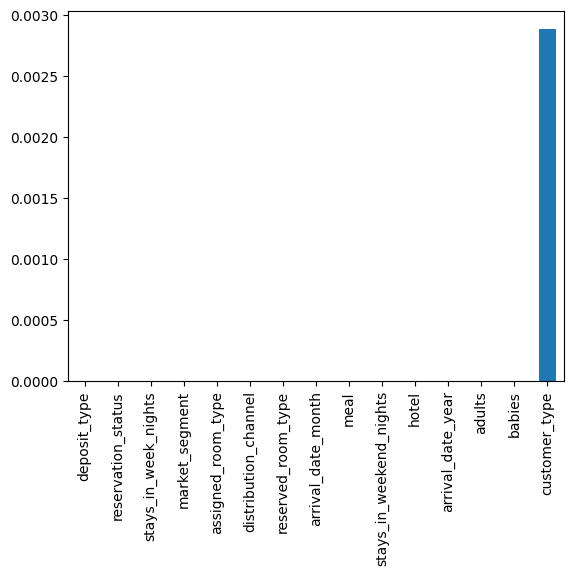

In [127]:
X = X_cat.copy()
print(X.shape)
y = data['is_canceled']
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

f_score = chi2(X_train, y_train)
print(f"F score:\n {f_score}")

p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace=True)
print(f"p-values:\n{p_values}")
## Comment: Lowest the p-values---- more important it is

# plot
p_values.plot.bar()

##### From above Fisher Score and Chi2 test removing 'customer_type', 'babies', 'arrival_date_year'

In [128]:
data = data.drop(['customer_type', 'babies', 'arrival_date_year', 'reservation_status'], axis=1)
data.shape

(87396, 21)

## After Data Cleaning:

In [129]:
print("Number of records (rows) Hotel Bookings Demand Datasets: ", data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", data.shape[1])
print("\nColumns names of the hotel booking datasets: \n", data.columns.tolist())

Number of records (rows) Hotel Bookings Demand Datasets:  87396
Number of features (columns) Hotel Bookings Demand Datasets:  21

Columns names of the hotel booking datasets: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


List of numerical and categorical columns:

In [130]:
# print(" Columns names and their types: \n", hotel_data.dtypes)
num_int = data.select_dtypes(include = [np.number]).columns.tolist()
print("\nNumeric Types columns name: \n", num_int)

cat_object_type = data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations', 'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type']


### Resetting index

In [131]:
data = data.reset_index(drop=True)

In [132]:
display(data.head())
print(data.shape)

## Important Features
data.columns.tolist()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0 weekend night,0 week night,2 adults,BB,...,Direct,0,C,C,3,No Deposit,0.0,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0 weekend night,0 week night,2 adults,BB,...,Direct,0,C,C,4,No Deposit,0.0,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0 weekend night,1 week night,1 adult,BB,...,Direct,0,A,C,0,No Deposit,0.0,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0 weekend night,1 week night,1 adult,BB,...,Corporate,0,A,A,0,No Deposit,304.0,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0 weekend night,2 week night,2 adults,BB,...,TA/TO,0,A,A,0,No Deposit,240.0,98.0,0,1


(87396, 21)


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'meal',
 'market_segment',
 'distribution_channel',
 'previous_cancellations',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

###  1.5 Saving dataframe for Model Training 

In [133]:
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\Robin - Data Science\1-Hotel Bookings Demand - Kaggle\Hotel-Booking-Demand\data"
data.to_csv(f'{folder_path}\\hotel_data_cleaned.csv', index=False)